# 1. Install and Import Dependencies

In [1]:
# # GitHub repo installation of paddle
# !python -m pip install paddlepaddle -i https://mirror.baidu.com/pypi/simple

In [2]:
# # Install paddle OCR
# !pip install paddleocr

In [3]:
from paddleocr import PaddleOCR, draw_ocr
from matplotlib import pyplot as plt
import cv2
import os
from pdf2image import convert_from_path

[2021/10/18 22:58:00] matplotlib DEBUG: matplotlib data path: c:\Users\Jun\Desktop\RDS3\FYP2\venv\lib\site-packages\matplotlib\mpl-data
[2021/10/18 22:58:00] matplotlib DEBUG: CONFIGDIR=C:\Users\Jun\.matplotlib
[2021/10/18 22:58:00] matplotlib DEBUG: matplotlib version 3.4.3
[2021/10/18 22:58:00] matplotlib DEBUG: interactive is False
[2021/10/18 22:58:00] matplotlib DEBUG: platform is win32
[2021/10/18 22:58:00] matplotlib DEBUG: loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', '_io', 'marshal', 'nt', 'winreg', '_frozen_importlib_external', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', 'encodings.latin_1', '_abc', 'abc', 'io', '__main__', '_stat', 'stat', '_collections_abc', 'genericpath', 'ntpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', 'encodings.cp1252', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'import

In [4]:
# Store pdf with convert_from_path function
images = convert_from_path(pdf_path='Data Folder/BCA.pdf')
for index, img in enumerate(images):
    img.save(f'Output (Images)\page{index + 1}.jpg', 'JPEG')

# 2. Instantiate Model and Detect

In [5]:
ocr_model = PaddleOCR(use_angle_cls = True, use_gpu = False)

[2021/10/18 22:58:02] root WARNING: version PP-OCRv2 not support cls models, use version PP-OCR instead
Namespace(help='==SUPPRESS==', use_gpu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, det_algorithm='DB', det_model_dir='C:\\Users\\Jun/.paddleocr/2.3.0.1\\ocr\\det\\ch\\ch_PP-OCRv2_det_infer', det_limit_side_len=960, det_limit_type='max', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_sast_polygon=False, rec_algorithm='CRNN', rec_model_dir='C:\\Users\\Jun/.paddleocr/2.3.0.1\\ocr\\rec\\ch\\ch_PP-OCRv2_rec_infer', rec_image_shape='3, 32, 320', rec_char_type='ch', rec_batch_num=6, max_text_length=25, rec_char_dict_path='c:\\Users\\Jun\\Desktop\\RDS3\\FYP2\\venv\\lib\\site-packages\\paddleocr\\ppocr\\utils\\

In [6]:
img_path = os.path.join('.', 'Output (Images)\page1.jpg')
img_path

'.\\Output (Images)\\page1.jpg'

In [7]:
result = ocr_model.ocr(img_path, cls=True)

[2021/10/18 22:58:04] root DEBUG: dt_boxes num : 112, elapse : 1.0134055614471436
[2021/10/18 22:58:08] root DEBUG: cls num  : 112, elapse : 4.474445343017578
[2021/10/18 22:58:36] root DEBUG: rec_res num  : 112, elapse : 27.638747692108154


In [8]:
result

[[[[66.0, 124.0], [312.0, 124.0], [312.0, 202.0], [66.0, 202.0]],
  ('DBCA', 0.85119367)],
 [[[583.0, 153.0], [1065.0, 153.0], [1065.0, 195.0], [583.0, 195.0]],
  ('REKENING TAHAPAN', 0.9632065)],
 [[[79.0, 268.0], [214.0, 268.0], [214.0, 295.0], [79.0, 295.0]],
  ('SOE TA WIE', 0.95781815)],
 [[[900.0, 270.0], [1077.0, 270.0], [1077.0, 297.0], [900.0, 297.0]],
  ('NO.REKENING', 0.9865494)],
 [[[1220.0, 273.0], [1353.0, 273.0], [1353.0, 300.0], [1220.0, 300.0]],
  ('7030073392', 0.8712082)],
 [[[81.0, 300.0], [192.0, 300.0], [192.0, 326.0], [81.0, 326.0]],
  ('CIPONDOH', 0.9863733)],
 [[[905.0, 312.0], [1026.0, 312.0], [1026.0, 339.0], [905.0, 339.0]],
  ('HALAMAN', 0.9811996)],
 [[[1223.0, 312.0], [1284.0, 312.0], [1284.0, 339.0], [1223.0, 339.0]],
  ('1/4', 0.84322494)],
 [[[79.0, 331.0], [339.0, 331.0], [339.0, 363.0], [79.0, 363.0]],
  ('PETIR RT 013 RW 003', 0.88671154)],
 [[[905.0, 346.0], [1016.0, 346.0], [1016.0, 380.0], [905.0, 380.0]],
  ('PERIODE', 0.99531984)],
 [[[1220.0, 

In [9]:
# Box coordinates
result[0][0]

[[66.0, 124.0], [312.0, 124.0], [312.0, 202.0], [66.0, 202.0]]

In [10]:
# Test and its confidence scores
result[0][1]

('DBCA', 0.85119367)

In [11]:
# Print all texts on an image (page 1)
for res in result:
    print(res[1][0])

DBCA
REKENING TAHAPAN
SOE TA WIE
NO.REKENING
7030073392
CIPONDOH
HALAMAN
1/4
PETIR RT 013 RW 003
PERIODE
JANUARI 2021
JL PETIR UTAMA 66
MATA UANG
IDR
TANGERANG 15147
INDONESIA
CATATAN:
REKEnING Ini SAMP:
BCAberha
menyetujuisegaladatayang
Rekening.
adaLaporanMutasiRekeningint
TANGGAL
KETERANGAN
CBG
MUTASI
SALDO
01/01
SALDO AWAL
636,953,471.73
18/8
3.ADM KLIRING
7030
2.000.00 DB
4/
636,951471.73
TRSF E-BANKING CR
0401/FTSCY/WS95051
100.000.000.00
100000000.00
P DEVIDEN
TIGA CAKRA SUKSES
04/01
TARIKAN ATM 04/01
500000.00 DB
04/01
TRSF E-BANKING CR
0401/FTSCY/WS95011
2000.000.00
2000000.00
Selisih ATK
SOE TA WIE
TRSF E-BANKING DB
04/01
0401/FTSCY/WS95051
100000.00 DB
100000.00
TANUMIHARDJ
TRSF E-BANKING CR
0401/FTSCY/WS95051
04/01
2,045,567.00
2045567.00
P DEVIDEN
TIGA CAKRA SUKSES
04/01
KARTU DEBIT
LOTTEMART
100.00 DB
TRSF E-BANKING DB
04/01
0401/FTFVA/WS95051
501000.00 DB
39358/0VO
087887950120
04/01
TRSF E-BANKING CR
0401/FTSCY/WS95051
46.276830.00
46276830.00
JS581L
SOE TA WIE
SOE TA W

In [12]:
# Store all texts in a comprehension list
[res[1][0] for res in result]

['DBCA',
 'REKENING TAHAPAN',
 'SOE TA WIE',
 'NO.REKENING',
 '7030073392',
 'CIPONDOH',
 'HALAMAN',
 '1/4',
 'PETIR RT 013 RW 003',
 'PERIODE',
 'JANUARI 2021',
 'JL PETIR UTAMA 66',
 'MATA UANG',
 'IDR',
 'TANGERANG 15147',
 'INDONESIA',
 'CATATAN:',
 'REKEnING Ini SAMP:',
 'BCAberha',
 'menyetujuisegaladatayang',
 'Rekening.',
 'adaLaporanMutasiRekeningint',
 'TANGGAL',
 'KETERANGAN',
 'CBG',
 'MUTASI',
 'SALDO',
 '01/01',
 'SALDO AWAL',
 '636,953,471.73',
 '18/8',
 '3.ADM KLIRING',
 '7030',
 '2.000.00 DB',
 '4/',
 '636,951471.73',
 'TRSF E-BANKING CR',
 '0401/FTSCY/WS95051',
 '100.000.000.00',
 '100000000.00',
 'P DEVIDEN',
 'TIGA CAKRA SUKSES',
 '04/01',
 'TARIKAN ATM 04/01',
 '500000.00 DB',
 '04/01',
 'TRSF E-BANKING CR',
 '0401/FTSCY/WS95011',
 '2000.000.00',
 '2000000.00',
 'Selisih ATK',
 'SOE TA WIE',
 'TRSF E-BANKING DB',
 '04/01',
 '0401/FTSCY/WS95051',
 '100000.00 DB',
 '100000.00',
 'TANUMIHARDJ',
 'TRSF E-BANKING CR',
 '0401/FTSCY/WS95051',
 '04/01',
 '2,045,567.00',
 '

# 3. Visualise Results

In [13]:
boxes = [res[0] for res in result]
texts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [14]:
# Specifying font path for draw_ocr method
font_path = os.path.join('fonts', 'latin.ttf')
font_path

'fonts\\latin.ttf'

In [15]:
# Imports image
img = cv2.imread(img_path) 

# Reorders the color channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

[2021/10/18 22:58:39] matplotlib.font_manager DEBUG: findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[2021/10/18 22:58:39] matplotlib.font_manager DEBUG: findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
[2021/10/18 22:58:39] matplotlib.font_manager DEBUG: findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
[2021/10/18 22:58:39] matplotlib.font_manager DEBUG: findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal 700 normal>) = 11.335
[2021/10/18 22:58:39] matplotlib.font_manager DEBUG: findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
[2021/10/18 22:58:39] matplotlib.font_manager DEBUG: findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
[2021/10/18 22:58:39] matplotlib.font_manager DEBUG: findfont: score(<Font 'DejaVu Serif' (DejaVu

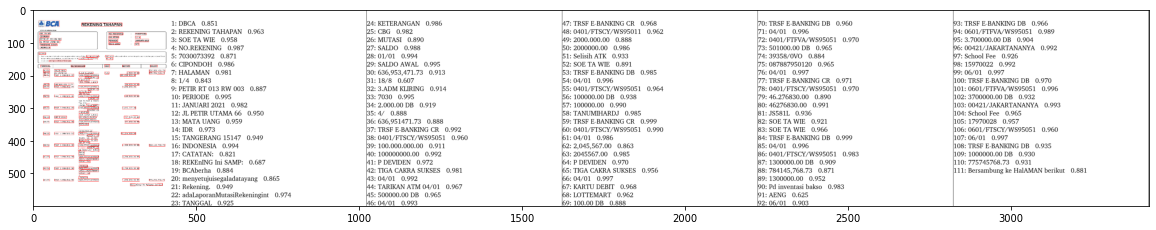

In [16]:
# Visualize our image and detections

# Resizing display area
plt.figure(figsize=(20, 20))

# Draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path=font_path) 

# Show the image using matplotlib
plt.imshow(annotated)

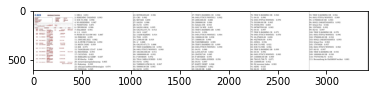

In [21]:
# Draw results using PIL

from PIL import Image
import numpy as np

# Reorders the color channels of the image
image = Image.open(img_path).convert('RGB')

# Draw annotations on image
annotated = draw_ocr(image, boxes, texts, scores, font_path=font_path) 
annotated_image = Image.fromarray(annotated)

# Save the image
annotated_image.save('result.jpg')

# Visualise the image
Image.open('result.jpg', 'r').show()